In [41]:
import os
import numpy as np
import pandas as pd
import re
from urllib2 import urlopen
from bs4 import BeautifulSoup

In [22]:
itunes = 'https://www.apple.com/legal/internet-services/itunes/us/terms.html'

In [24]:
soup = BeautifulSoup(urlopen(itunes), 'html')

In [29]:
descriptions = soup.findAll("div", {"class":"section-content"})

In [32]:
paragraphs = []
for line in descriptions:
    paragraphs.append(line.findAll("p"))

In [36]:
print len(paragraphs)

3


In [37]:
agreement = paragraphs[2]

In [39]:
len(agreement)

142

In [50]:
cleaned = []
for line in agreement:
    cleaned.append(re.sub(r"(<.?p>)", "", str(line)))

In [66]:
cleaned = " ".join(cleaned)

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [62]:
from PIL import Image
import matplotlib.pyplot as plt

/Users/amberoconnell/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [77]:
stopwords = set(STOPWORDS)
stopwords.add('Apple')
stopwords.add('service')
stopwords.add('content')
stopwords.add('agreement')
stopwords.add('user')
stopwords.add('use')
stopwords.add('services')
stopwords.add('may')
stopwords.add('will')
stopwords.add('agree')

In [78]:
wordcloud = WordCloud(stopwords=stopwords).generate(cleaned)

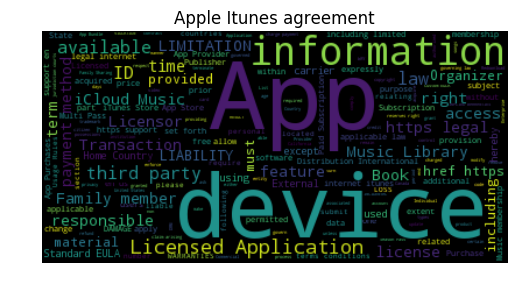

In [80]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Apple Itunes agreement')
plt.show()

In [81]:
amazon = 'https://www.amazon.com/gp/help/customer/display.html?nodeId=201380010'

In [82]:
soup = BeautifulSoup(urlopen(amazon), 'html')

In [156]:
#getting an idea of the structure
#soup 

In [84]:
descriptions = soup.findAll("div", {"class":"help-content"})

In [111]:
cleaned = []
for line in descriptions:
    cleaned.append(line.findAll("p"))

In [157]:
#checking on structure, most prints I've commented out to keep the file smaller
#cleaned[0]

In [113]:
cleaned = re.sub(r"(<.?p>)|(<.?strong>)|(<.?b>)|(\\n)|(<a.+\">)|(</a>)", "", str(cleaned[0]))

In [158]:
#cleaned

In [115]:
stopwords.add('amazon')

In [116]:
wordcloud = WordCloud(stopwords=stopwords).generate(cleaned)

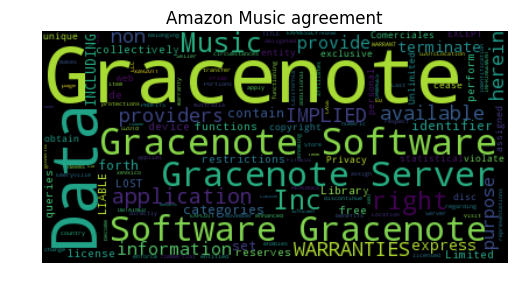

In [117]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Amazon Music agreement')
plt.show()

In [118]:
spotify = 'https://www.spotify.com/us/legal/end-user-agreement/plain/'

In [119]:
soup = BeautifulSoup(urlopen(spotify), 'html')

In [159]:
#soup

In [143]:
descriptions = soup.findAll("p")

In [144]:
len(descriptions)

140

In [145]:
descriptions = descriptions[4:138]

In [149]:
cleaned = []
for line in descriptions: 
    cleaned.append(re.sub(r"(<.?p>)|(<.?strong>)|(<.?b>)|(\\n)|(<a.+\">)|(</a>)", "", str(line)))

In [151]:
clean = " ".join(cleaned)

In [152]:
stopwords.add('spotify')

In [154]:
wordcloud = WordCloud(stopwords=stopwords).generate(clean)

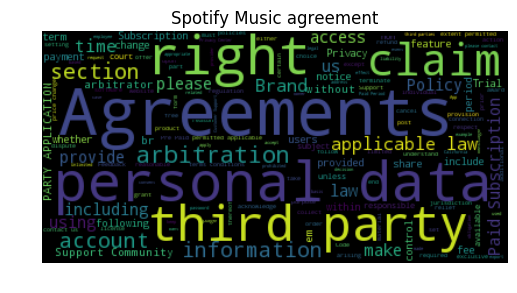

In [155]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Spotify Music agreement')
plt.show()